<a href="https://colab.research.google.com/github/sakshamsomani2345/Breast-Cancer-Detection/blob/main/cancerdetectionusingknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.drop(['Unnamed: 32'],1,inplace=True)
X=np.array(df.drop(['diagnosis'],1))
y=np.array(df['diagnosis'])
df

<ipython-input-3-f300e36750ee>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Unnamed: 32'],1,inplace=True)
<ipython-input-3-f300e36750ee>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['diagnosis'],1))


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
LEncoder = LabelEncoder()
df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])
# df.isnull().sum

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm_KNN = confusion_matrix(y_test, y_pred)
    print(cm_KNN)
    print("Accuracy score of train KNN")
    print(accuracy_score(y_train, trained_model.predict(X_train))*100)
    print("Accuracy score of test KNN")
    print(accuracy_score(y_test, y_pred)*100)
    
    knn.append(accuracy_score(y_test, y_pred)*100)

[[116  13]
 [  4  67]]
Accuracy score of train KNN
100.0
Accuracy score of test KNN
91.5
[[124   5]
 [  7  64]]
Accuracy score of train KNN
95.1219512195122
Accuracy score of test KNN
94.0
[[120   9]
 [  3  68]]
Accuracy score of train KNN
94.85094850948511
Accuracy score of test KNN
94.0
[[123   6]
 [  6  65]]
Accuracy score of train KNN
94.579945799458
Accuracy score of test KNN
94.0
[[120   9]
 [  5  66]]
Accuracy score of train KNN
93.76693766937669
Accuracy score of test KNN
93.0
[[121   8]
 [  5  66]]
Accuracy score of train KNN
93.76693766937669
Accuracy score of test KNN
93.5
[[121   8]
 [  4  67]]
Accuracy score of train KNN
94.03794037940379
Accuracy score of test KNN
94.0
[[122   7]
 [  5  66]]
Accuracy score of train KNN
94.579945799458
Accuracy score of test KNN
94.0
[[121   8]
 [  4  67]]
Accuracy score of train KNN
94.85094850948511
Accuracy score of test KNN
94.0
[[121   8]
 [  6  65]]
Accuracy score of train KNN
94.03794037940379
Accuracy score of test KNN
93.0
[[120  

91.92307692307693


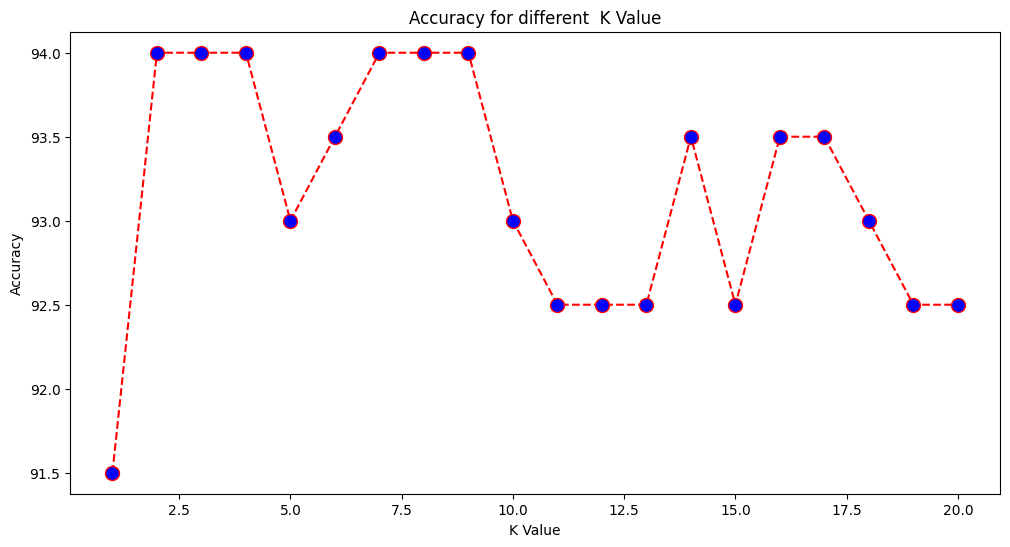

In [9]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 
print(precision_score(y_test, y_pred, average='macro')*100)